# 인공지능 과제 4
---
이름: 김태산

학과: 자동차공학과

학번: 20143211

---
### 1. [순환신경망] [예제 8-1]에서 y_prime(2), y_prime(3), y_prime(4)를 구하는 과정을 보이세요. 또한, x(5) = (0.1, 0.1)^T, x(6) = (0.1, 0.0)^T이 추가되어 샘플의 길이가 4에서 6이 되었다면 y_prime(5), y_prime(6)을 구하세요.

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
U = torch.tensor([0.1, 0.1, 0.0, 0.0, 0.0, -0.1]).view(-1, 2)
W = torch.tensor([0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, -0.1, -0.1]).view(-1, 3)
V = torch.tensor([0.0, 0.1, 0.0, -0.2, 0.0, 0.0]).view(-1, 3)
b = torch.tensor([0.0, 0.0, 0.2]).view(-1, 1)
c = torch.tensor([0.2, 0.1]).view(-1, 1)

### y_prime(1) 계산
X = torch.tensor([[0.0, 1.0], [0.0, 0.1], [0.1, -0.2], [0.5, 0.0]]).view(-1, 2, 1)
x1 = X[0]
h0 = torch.tensor([0.0, 0.0, 0.0]).view(-1, 1)
a1 = W.mm(h0) + U.mm(x1) + b
h1 = torch.tanh(a1)
y_prime1 = F.softmax(V.mm(h1) + c, dim=0)
print(f"x(1): \n{x1},\ny_prime(1): \n{y_prime1}\n")

### y_prime(2) 계산
x2 = X[1]
a2 = W.mm(h1) + U.mm(x2) + b
h2 = torch.tanh(a2)
y_prime2 = F.softmax(V.mm(h2) + c, dim=0)
print(f"x(2): \n{x2},\ny_prime(2): \n{y_prime2}\n")

### y_prime(3) 계산
x3 = X[2]
a3 = W.mm(h2) + U.mm(x3) + b
h3 = torch.tanh(a3)
y_prime3 = F.softmax(V.mm(h3) + c, dim=0)
print(f"x(3): \n{x3},\ny_prime(3): \n{y_prime3}\n")

### y_prime(4) 계산
x4 = X[3]
a4 = W.mm(h3) + U.mm(x4) + b
h4 = torch.tanh(a4)
y_prime4 = F.softmax(V.mm(h4) + c, dim=0)
print(f"x(4): \n{x4},\ny_prime(4): \n{y_prime4}\n")


### y_prime(5) 계산
X = torch.cat([X, torch.tensor([[0.1, 0.1], [0.1, 0.0]]).view(-1, 2, 1)])
x5 = X[4]
a5 = W.mm(h4) + U.mm(x5) + b
h5 = torch.tanh(a5)
y_prime5 = F.softmax(V.mm(h5) + c, dim=0)
print(f"x(5): \n{x5},\ny_prime(5): \n{y_prime5}\n")

### y_prime(6) 계산
x6 = X[5]
a6 = W.mm(h5) + U.mm(x6) + b
h6 = torch.tanh(a6)
y_prime6 = F.softmax(V.mm(h6) + c, dim=0)
print(f"x(6): \n{x6},\ny_prime(6): \n{y_prime6}\n")

x(1): 
tensor([[0.],
        [1.]]),
y_prime(1): 
tensor([[0.5299],
        [0.4701]])

x(2): 
tensor([[0.0000],
        [0.1000]]),
y_prime(2): 
tensor([[0.5260],
        [0.4740]])

x(3): 
tensor([[ 0.1000],
        [-0.2000]]),
y_prime(3): 
tensor([[0.5246],
        [0.4754]])

x(4): 
tensor([[0.5000],
        [0.0000]]),
y_prime(4): 
tensor([[0.5274],
        [0.4726]])

x(5): 
tensor([[0.1000],
        [0.1000]]),
y_prime(5): 
tensor([[0.5262],
        [0.4738]])

x(6): 
tensor([[0.1000],
        [0.0000]]),
y_prime(6): 
tensor([[0.5256],
        [0.4744]])



### 2. [순환신경망] y(t) = (0, 1)^T일 때 식 (8.16)을 유도하세요. 또한 식 (8.19)의 일반화된 식 (8.16)으로 변환 과정을 설명하세요.
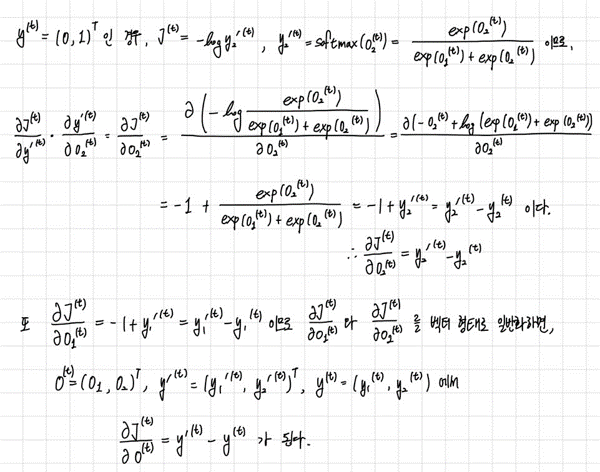

### 3. 실행 및 해석하여 과정을 10줄 이내로 설명하세요.




Practical PyTorch: Classifying Names with a Character-Level RNN

Specifically, we'll train on a few thousand surnames from 18 languages of origin, and predict which language a name is from based on the spelling

#### Preparing the Data

In [ ]:
%matplotlib inline

In [ ]:
# 이번 실습에서 사용할 데이터를 다운로드 받고 앞축을 푼다.
import requests
import zipfile

data = requests.get("https://download.pytorch.org/tutorial/data.zip")

with open("./data.zip", 'wb') as f:
  f.write(data.content)

zipfile.ZipFile("./data.zip").extractall("./")

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

# 해당 디렉토리에 있는 모든 txt 파일명을 출력한다.
print(findFiles('data/names/*.txt'))        

import unicodedata
import string

# 대소문자 알파벳과 . , : '를 포함하여 문자 변수를 만든다.
all_letters = string.ascii_letters + " .,;'" 
n_letters = len(all_letters)

# 유니코드 문자열을 일반 아스키 코드로 변환하는 함수이다.
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Ślusàrski를 유니코드 문자열에서 아스키로 변환하여 출력해본다.
print(unicodeToAscii('Ślusàrski'))

category_lines = {} # 언어 별로 사람의 이름들을 담기 위한 딕셔너리를 초기화한다.
all_categories = [] # 언어명을 담기 위한 리스트를 초기화한다.

# filename에 해당하는 파일의 모든 줄을 lines에 입력하고,
# 모든 이름을 아스키로 변환한 리스트를 리턴하는 함수이다.
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# 다운로드 받은 데이터의 모든 txt 파일을 읽어 for 문을 실행한다.
# category에는 각각의 언어명이 입력된다.
# 각각의 언어명을 all_categories에 append하고,
# readLines 함수로 해당 언어의 모든 이름에 대한 리스트를 생성한다.
# category를 key로, 이름에 대한 리스트를 value로 하여 catergory_lines 딕셔너리에 입력한다.
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

# 모든 언어의 갯수는 총 18개이다.
n_categories = len(all_categories)

['data/names/Spanish.txt', 'data/names/Polish.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/German.txt', 'data/names/Italian.txt', 'data/names/Japanese.txt', 'data/names/Dutch.txt', 'data/names/Scottish.txt', 'data/names/French.txt', 'data/names/Russian.txt', 'data/names/Czech.txt', 'data/names/Korean.txt', 'data/names/English.txt', 'data/names/Irish.txt', 'data/names/Arabic.txt', 'data/names/Portuguese.txt', 'data/names/Greek.txt']
Slusarski


In [ ]:
# Italian의 5개의 value를 출력해보면, 아스키로 변환된 이름이
# 딕셔너리에 입력되어 있는 것을 알 수 있다.
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


#### Turning Names into Tensors

In [ ]:
import torch

# 위에서 만든 문자 변수를 안에서 입력한 문자의 인덱스를 리턴하는 함수이다.
def letterToIndex(letter):
    return all_letters.find(letter)

# 입력한 문자를 1*n_letters 크기의 원-핫 코드 텐서로 만들어주는 함수이다.
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <>,
# or an array of one-hot letter vectors
# 입력한 line(이름)을 각각의 문자마다 원-핫 코드 텐서 형태로 
# 변환된 행렬 텐서를 리턴한다.
# 리턴된 텐서는 이름의 길이를 행 길이로 하고, 
# 열 길이가 원-핫 코드의 길이가 되는 line_length*1*n_letters 크기의 행렬이다.
# 중간에 크기 1은 배치 사이즈로, 파이토치가 입력받을 수 있는 형태를 따른다.
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

# 문자 'J'가 원-핫 코드로 변환된 것을 알 수 있다.
print(letterToTensor('J'))
# 이름 'Jones'가 각각의 문자별로 원-핫 코드로 변환되어 이름의 길이만큼 
# 행의 길이가 5인 것을 알 수 있다.
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


#### Creating the Network
- 아래의 RNN는 다음 그림과 같이 동작한다.
> 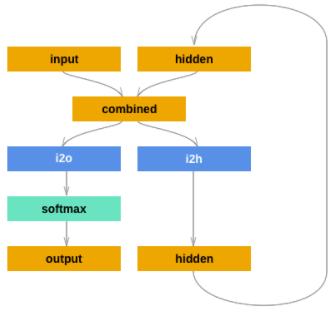

In [ ]:
import torch.nn as nn

# RNN 클래스를 정의한다.
class RNN(nn.Module):
# 신경망 입력 갯수와 은닉층의 갯수, 출력층의 갯수를 입력받아 초기 생성자를 정의한다.
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        # RNN의 다음 상태의 은닉층을 구하기 위한 완전연결층을 정의한다.
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        # RNN의 현재 입력에 대한 출력층을 구하기 위한 완전연결층을 정의한다.
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        # 출력에 대한 로그 소프트맥스 값을 계산하기 위한 함수를 정의한다.
        self.softmax = nn.LogSoftmax(dim=1)

    # 전방 연산을 수행하는 메서드이다.
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1) # 입력층과 은닉층을 합친다.
        hidden = self.i2h(combined)   # 다음 상태의 은닉층을 구한다.
        output = self.i2o(combined)   # 현재 상태의 출력층을 구한다.
        output = self.softmax(output) # 출력층의 값을 로그 확률값으로 계산한다.
        return output, hidden         # 현재 상태의 출력층과 다음 상태의 은닉층을 리턴한다.

    # 처음 상태의 은닉층을 영 벡터로 정의해주는 메서드이다.
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128 # 은닉층의 갯수를 128개로 지정한다.
# RNN 객체를 생성한다.
# 입력층의 갯수은 전체 문자 갯수로 하고, 문자를 입력할 때에는 원-핫 코드 형태로 입력한다.
# 출력증의 갯수는 전체 언어의 갯수로 한다.
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
# 하나의 문자를 원-핫 코드 텐서로 변환하여 rnn에 입력한다.
input = letterToTensor('A')      
# 초기 상태의 은닉층을 영 벡터로 생성한다.
hidden =torch.zeros(1, n_hidden)
# 문자와 은닉층을 rnn에 입력하면 출력층과 다음 상태의 은닉층이 리턴된다.
# 출력층의 값들은 각각의 언어에 대한 로그-확률값을 의미한다.
output, next_hidden = rnn(input, hidden)

In [ ]:
# 이름을 원-핫 코드 텐서 행렬로 변환한 후 문자 별로 rnn에 입력하는 코드이다.
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
# 출력층의 결과를 보면 각 언어에 대한 로그-확률값이 계산된 것을 알 수 있다.
print(output)

tensor([[-2.7839, -3.0314, -2.9777, -2.8498, -2.8961, -2.9277, -2.8567, -2.8521,
         -2.8428, -2.8975, -2.7859, -2.9222, -2.8875, -2.8704, -2.9887, -2.8976,
         -2.8710, -2.9226]], grad_fn=<LogSoftmaxBackward>)


#### Training
1. Preparing for Training

In [ ]:
# 출력층에서 계산된 로그-확률값으로부터 예측된 언어가 어떤 언어인지 구하는 함수이다.
def categoryFromOutput(output):
    # k번째로 큰 element와 해당 인덱스를 리턴해준다.
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item() # 언어에 대한 인덱스이다.
    # all_categories에서 언어와 언어에 대한 인덱스를 리턴한다.
    return all_categories[category_i], category_i

# 위에서 신경망이 예측한 언어는 Spanish이다.
print(categoryFromOutput(output))

('Arabic', 15)


In [ ]:
# 훈련 샘플을 데이터로부터 랜덤하게 생성하는 코드이다.
import random
# 입력된 전체 언어 리스트로부터 랜덤하게 언어를 선택하여 리턴하는 함수이다.
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# 랜덤하게 선택한 언어로부터 랜덤하게 이름을 선택한다.
# 선택된 언어에 대한 인덱스를 계산하고 선택된 이름을 원-핫 코드 행렬로 변환한다.
# 선택된 언어, 선택된 이름, 언어의 인덱스, 이름의 원-핫 코드 행렬을 리턴한다.
def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

# 아래의 for 문은 랜덤하게 훈련 샘플을 생성해주는 반복문이 된다.
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Czech / line = Voneve tensor([11])
category = French / line = Larue tensor([9])
category = Italian / line = Rotolo tensor([5])
category = English / line = Maclean tensor([13])
category = Arabic / line = Khouri tensor([15])
category = Spanish / line = Mata tensor([0])
category = German / line = Kempf tensor([4])
category = Russian / line = Yepishev tensor([10])
category = Dutch / line = Klerks tensor([7])
category = Irish / line = Aodh tensor([14])


2. Training the Network

In [ ]:
# 신경망이LogSoftmax 값을 리턴하므로 NLL loss를 cost function으로 사용한다.
criterion = nn.NLLLoss()

In [ ]:
# 학습률을 지정한다.
learning_rate = 0.005

# 신경망을 학습시킬 함수를 정의한다.
def train(category_tensor, line_tensor):
    # 신경망에서 정의한 initHidden 메서드를 사용하여 초기 은닉층을 정의한다.
    hidden = rnn.initHidden()
    # 신경망의 모든 파라미터를 0으로 초기화한다.
    rnn.zero_grad()

    # 입력된 이름의 길이만큼 전방 연산을 수행한다.
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    # 신경망의 예측값과 실제값을 목적함수에 입력하여 loss를 계산하고
    # loss를 이용하여 파라미터에 대한 그레디언트를 계산한다.
    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    # 신경망의 파라미터를 갱신하는 코드로,
    # 모든 파라미터에 대해 계산된 그레디언트에 학습률을 곱한 값을 빼줌으로써
    # 파라미터를 갱신한다.
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
# add_(Tensor other, *, Number alpha)
    # 학습이 완료되면 계산된 예측값과 loss를 리턴한다.
    return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000   # 총 100000회의 학습을 수행한다.
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

# 훈련에 걸리는 시간을 계산해주는 함수이다.
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    # 매 반복마다 훈련 샘플을 랜덤하게 생성하여 신경망에 입력한다.
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # print_every 마다 계산된 loss 값과 해당 언어에 속한 이름, 
    # 예측값으로부터 확률값이 가장 큰 언어, 실제 언어와의 일치 여부를 출력한다.
    # 실제 언어와 예측 언어가 일치하지 않을 경우 실제 언어도 함께 출력한다.
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, \
                                  timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    # plot_every 마다 계산된 loss를 평균하여 append하고 다시 0으로 초기화한다.
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

tensor([[5]])
5000 5% (0m 6s) 2.0164 Agnusdei / Italian ✓
tensor([[15]])
10000 10% (0m 13s) 2.9930 Rheem / Arabic ✗ (Korean)
tensor([[7]])
15000 15% (0m 21s) 2.3431 Belmonte / Dutch ✗ (Spanish)
tensor([[16]])
20000 20% (0m 27s) 2.3709 Victors / Portuguese ✗ (French)
tensor([[12]])
25000 25% (0m 34s) 0.9283 Youj / Korean ✓
tensor([[4]])
30000 30% (0m 41s) 0.8451 Schrader / German ✓
tensor([[4]])
35000 35% (0m 48s) 1.2757 Brauer / German ✓
tensor([[11]])
40000 40% (0m 56s) 0.4816 Spicka / Czech ✓
tensor([[9]])
45000 45% (1m 3s) 2.3506 Romijn / French ✗ (Dutch)
tensor([[12]])
50000 50% (1m 10s) 0.8916 Shim / Korean ✓
tensor([[13]])
55000 55% (1m 17s) 2.2738 Tremblay / English ✗ (French)
tensor([[5]])
60000 60% (1m 24s) 0.1160 Orsini / Italian ✓
tensor([[0]])
65000 65% (1m 31s) 1.2294 Abana / Spanish ✓
tensor([[1]])
70000 70% (1m 38s) 1.2965 Swatchak / Polish ✗ (Czech)
tensor([[7]])
75000 75% (1m 46s) 2.4413 Holden / Dutch ✗ (English)
tensor([[9]])
80000 80% (1m 53s) 2.7312 Desmond / Frenc

3. Plotting the Results

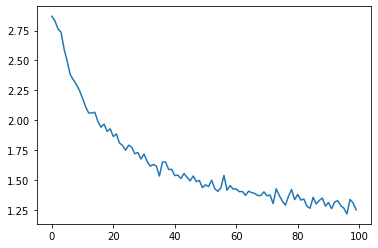

In [ ]:
# 위에서 누적한 loss를 이용하여 그래프를 그린다.
# 그래프 결과를 보면, 훈련이 진행될수록 loss는 점점 작아지므로
# 훈련이 제대로 진행되었다는 것을 알 수 있다.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

#### Evaluating the Results

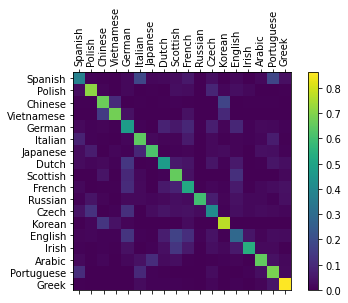

In [ ]:
# 서로 다른 언어에 대해 RNN이 어떠한 성능을 보이는지 
# 확인하기 위한 confusion matrix를 정의한다.
# confusion matrix의 각각의 행은 실제 언어를 의미하고,
# 각각의 열은 예측 언어를 의미한다.
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# RNN을 평가하기 위한 함수를 정의한다.
# evaluate 함수는 테스트 샘플을 이용하여 전방 연산만 수행하고
# 역전파는 하지 않으므로 파라미터는 갱신되지 않는다.
# 전방 연산을 통해 구한 예측값을 리턴한다.
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 총 10000회의 신경망 평가를 진행한다.
# 매 반복마다 랜덤하게 선택한 샘플을 신경망에 입력하여 전방 연산하고
# 예측값을 사용하여 예측 언어와 해당 인덱스를 구한다.
# 예측 언어를 구할 때마다 confusion matrix의 실제 언어 행, 예측 언어 열의 값을
# 1 증가시킨다.
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 각각의 행에 대한 평균을 계산한다.
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.matshow(confusion.numpy())를 사용하면 confusion matrix를 시각화할 수 있다.
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# x축과 y축의 각각의 값에 이름을 지정한다.
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()
# 출력 결과의 confusion matrix를 통해 어느 언어에 대해 예측을 잘하고
# 어느 언어에 대해 예측이 부정확한지 확인할 수 있다.
# 예를 들어, 그리스어의 경우 실제 그리스어에 대한 그리스어 예측이 거의 1에 
# 가까운 것으로 보아 그리스어에 대해 예측을 매우 잘한다는 것을 알 수 있다.
# 반면, 스페인어의 경우 실제 스페인어가 이탈리아어나 포르투갈어로 예측되는
# 경우가 많은 것을 알 수 있다.

#### Running on User Input

In [ ]:
# 다운로드 받은 데이터 외의 새로운 샘플을 신경망에 입력하여
# 예측하기 위한 함수를 정의한다.
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    # 신경망을 평가할 때에는 그레디언트를 계산하지 않는다.
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        # 예측 확률이 가장 높은 n_predictions 개의 결과를 구한다.
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        # 예측 결과를 출력한다.
        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])
            
# 출력 결과를 보면, 해당 성에 대한 예측 확률이 가장 높은 순으로 3개의 언어가 
# 출력된 것을 알 수 있다.
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.46) Russian
(-1.22) Czech
(-3.61) English

> Jackson
(-0.13) Scottish
(-2.65) English
(-4.07) Greek

> Satoshi
(-0.98) Italian
(-1.66) Polish
(-1.94) Arabic


문제 3에서 사용하는 데이터는 총 18개의 파일로 구성되어 있고, 각각의 파일에는 각 줄마다 사람의 이름이 입력되어 있다. 이 데이터를 활용하여 성을 입력했을 때 어느 나라의 언어인지를 예측하는 신경망을 생성한다. 데이터를 불러와 category_lines 딕셔너리에 언어 : [이름, ...]의 형태로 저장하여 사용한다. 데이터를 신경망에 입력할 때에는 정량화된 수치로 데이터를 변환하여 입력하여야 한다. 이번 실습에서는 각각의 문자를 원-핫 코드 벡터 형태로 변환하여 신경망에 입력한다. 데이터를 원-핫 코드 벡터로 변환한 후, 신경망에 입력한다. 신경망은 두 개의 완전연결층으로 구성된다. 입력층과 은닉층을 결합한 후 하나의 완전연결층에 입력하여 다음 상태의 은닉층을 구하고, 다른 하나의 완전연결층에 입력하여 출력층을 구한다. 데이터로부터 훈련 샘플을 임의로 선택하는 함수로부터 훈련 샘플을 생성하고 이를 train 함수로 입력하여 신경망을 학습한다. train 함수는 입력된 이름의 길이만큼 신경망의 전방 연산을 수행하고 이로부터 loss를 계산하고 역전파함으로써 신경망을 학습시킨다. 이번 실습에서 RNN의 훈련은 총 100000회 진행한다. 신경망을 훈련시킨 후 10000회의 평가를 진행한다. 평가를 할 때에는 confusion matrix를 사용하여 예측 결과를 확인한다. confusion matrix를 사용하면 어떤 입력에 대한 예측을 어떤 결과로 부정확하게 하는지 확인할 수 있다. predict 함수는 새로운 입력에 대한 예측 결과를 확률값이 높은 순으로 n개의 언어를 출력해준다. 이를 통해서 훈련된 신경망이 도출하는 예측 결과를 확인할 수 있다.

### 4. 실행 및 해석하여 과정을 10줄 이내로 설명하세요.

In [ ]:
# !pip install torch<=1.2.0
# !pip install torchtext
%matplotlib inline

!pip install torch==1.5.0 torchtext==0.6.0

     |████████████████████████████████| 752.0MB 23kB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 1.1MB 46.2MB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.5.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


## Text Classification Tutorial
### Load data with ngrams

In [ ]:
import torch
import torchtext
from torchtext.datasets import text_classification
NGRAMS = 2
import os
if not os.path.isdir('./.data'):
	os.mkdir('./.data')
train_dataset, test_dataset = text_classification.DATASETS['AG_NEWS'](
    root='./.data', ngrams=NGRAMS, vocab=None)
BATCH_SIZE = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ag_news_csv.tar.gz: 11.8MB [00:00, 84.5MB/s]
120000lines [00:08, 13431.76lines/s]
120000lines [00:19, 6056.02lines/s]
7600lines [00:01, 6130.50lines/s]


### Define the model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class TextSentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()
        
    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

### Initiate an instance

In [ ]:
VOCAB_SIZE = len(train_dataset.get_vocab())
EMBED_DIM = 32
NUN_CLASS = len(train_dataset.get_labels())
model = TextSentiment(VOCAB_SIZE, EMBED_DIM, NUN_CLASS).to(device)

### Functions used to generate batch

In [ ]:
def generate_batch(batch):
    label = torch.tensor([entry[0] for entry in batch])
    text = [entry[1] for entry in batch]
    offsets = [0] + [len(entry) for entry in text]
    # torch.Tensor.cumsum returns the cumulative sum
    # of elements in the dimension dim.
    # torch.Tensor([1.0, 2.0, 3.0]).cumsum(dim=0)
    
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text = torch.cat(text)
    return text, offsets, label

### Define functions to train the model and evaluate results

In [ ]:
from torch.utils.data import DataLoader

def train_func(sub_train_):

    # Train the model
    train_loss = 0
    train_acc = 0
    data = DataLoader(sub_train_, batch_size=BATCH_SIZE, shuffle=True,
                      collate_fn=generate_batch)
    for i, (text, offsets, cls) in enumerate(data):
        optimizer.zero_grad()
        text, offsets, cls = text.to(device), offsets.to(device), cls.to(device)
        output = model(text, offsets)
        loss = criterion(output, cls)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        train_acc += (output.argmax(1) == cls).sum().item()

    # Adjust the learning rate
    scheduler.step()
    
    return train_loss / len(sub_train_), train_acc / len(sub_train_)

def test(data_):
    loss = 0
    acc = 0
    data = DataLoader(data_, batch_size=BATCH_SIZE, collate_fn=generate_batch)
    for text, offsets, cls in data:
        text, offsets, cls = text.to(device), offsets.to(device), cls.to(device)
        with torch.no_grad():
            output = model(text, offsets)
            loss = criterion(output, cls)
            loss += loss.item()
            acc += (output.argmax(1) == cls).sum().item()

    return loss / len(data_), acc / len(data_)

### Split the dataset and run the model

In [ ]:
import time
from torch.utils.data.dataset import random_split
N_EPOCHS = 5
min_valid_loss = float('inf')

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=4.0)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.9)

train_len = int(len(train_dataset) * 0.95)
sub_train_, sub_valid_ = \
    random_split(train_dataset, [train_len, len(train_dataset) - train_len])

for epoch in range(N_EPOCHS):

    start_time = time.time()
    train_loss, train_acc = train_func(sub_train_)
    valid_loss, valid_acc = test(sub_valid_)

    secs = int(time.time() - start_time)
    mins = secs / 60
    secs = secs % 60

    print('Epoch: %d' %(epoch + 1), " | time in %d minutes, %d seconds" %(mins, secs))
    print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
    print(f'\tLoss: {valid_loss:.4f}(valid)\t|\tAcc: {valid_acc * 100:.1f}%(valid)')

Epoch: 1  | time in 0 minutes, 24 seconds
	Loss: 0.0260(train)	|	Acc: 84.9%(train)
	Loss: 0.0002(valid)	|	Acc: 90.2%(valid)
Epoch: 2  | time in 0 minutes, 24 seconds
	Loss: 0.0118(train)	|	Acc: 93.8%(train)
	Loss: 0.0003(valid)	|	Acc: 90.7%(valid)
Epoch: 3  | time in 0 minutes, 24 seconds
	Loss: 0.0068(train)	|	Acc: 96.4%(train)
	Loss: 0.0004(valid)	|	Acc: 90.6%(valid)
Epoch: 4  | time in 0 minutes, 24 seconds
	Loss: 0.0038(train)	|	Acc: 98.1%(train)
	Loss: 0.0003(valid)	|	Acc: 91.1%(valid)
Epoch: 5  | time in 0 minutes, 24 seconds
	Loss: 0.0022(train)	|	Acc: 99.0%(train)
	Loss: 0.0002(valid)	|	Acc: 91.4%(valid)


### Evaluate the model with test dataset

In [ ]:
print('Checking the results of test dataset...')
test_loss, test_acc = test(test_dataset)
print(f'\tLoss: {test_loss:.4f}(test)\t|\tAcc: {test_acc * 100:.1f}%(test)')

Checking the results of test dataset...
	Loss: 0.0002(test)	|	Acc: 89.2%(test)


### Test on a random news

In [ ]:
import re
from torchtext.data.utils import ngrams_iterator
from torchtext.data.utils import get_tokenizer

ag_news_label = {1 : "World",
                 2 : "Sports",
                 3 : "Business",
                 4 : "Sci/Tec"}

def predict(text, model, vocab, ngrams):
    tokenizer = get_tokenizer("basic_english")
    with torch.no_grad():
        text = torch.tensor([vocab[token]
                            for token in ngrams_iterator(tokenizer(text), ngrams)])
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = "MEMPHIS, Tenn. – Four days ago, Jon Rahm was \
    enduring the season’s worst weather conditions on Sunday at The \
    Open on his way to a closing 75 at Royal Portrush, which \
    considering the wind and the rain was a respectable showing. \
    Thursday’s first round at the WGC-FedEx St. Jude Invitational \
    was another story. With temperatures in the mid-80s and hardly any \
    wind, the Spaniard was 13 strokes better in a flawless round. \
    Thanks to his best putting performance on the PGA Tour, Rahm \
    finished with an 8-under 62 for a three-stroke lead, which \
    was even more impressive considering he’d never played the \
    front nine at TPC Southwind."

vocab = train_dataset.get_vocab()
model = model.to("cpu")

print("This is a %s news" %ag_news_label[predict(ex_text_str, model, vocab, 2)])

This is a Sports news


text classfication datasets을 활용한 텍스트 분류에 대해 학습한다. 데이터셋 중에서 World, Sports, Business, Sci/Tec의 4개의 클래스로 구성되는 'AG_NEWS' 데이터셋을 사용하고, 데이터를 가져올 때는 ngrams를 적용하여 bi-gram(n=2) 형태로 가져오므로 각각의 단어와 bi-gram 문자열이 추가된 형태가 된다. 그리고 학습시킬 신경망을 정의한다. 신경망은 text를 임베딩하는 EmbeddingBag층과 fc층으로 구성된다. EmbeddingBag층에 text를 입력하면, 단어 사이의 상호작용을 분석하여 EMBED_DIM=32차원으로 변환하고 fc층을 통과하여 클래스 수만큼의 예측값을 리턴한다. 모델을 학습시킬 때는 train_func를 정의하여 사용한다. 여기서 미니배치를 DataLoader로 생성할 때 generate_batch라는 함수를 사용하여 매 샘플이 입력되면, 샘플의 text와 각 단어의 길이가 담긴 offsets, 해당 text의 label이 하나의 배치가 된다. 목적함수는 CrossEntropy를, optimizer는 SGD를 사용한다. 또한, 학습률 scheduler를 사용하는데, scheduler에 의해 epoch에 따라 학습률이 변화한다. 훈련 데이터를 훈련과 검증 데이터로 나눈 후 5 epoch만큼 모델을 학습시킨다. 모델을 학습시킨 후 테스트 데이터를 통해 모델의 일반화 성능을 평가한다. 마지막으로 임의의 뉴스로 신경망을 테스트한다. 이 때 get_tokenizer는 입력한 text를 token 단위로 쪼갠다. 또 ngrams_iterator는 token 단위의 text를 ngrams 단위로 묶어준다. 이를 학습된 모델에 통과시키면 해당 뉴스의 클래스를 구할 수 있다. 출력 결과를 보면 해당 뉴스는 Sports 뉴스라고 예측한 것을 알 수 있다.

### 5. 실행 및 해석하여 과정을 10줄 이내로 설명하세요.

### TorchText로 언어 번역하기

In [ ]:
!python -m spacy download en
!python -m spacy download de

     |████████████████████████████████| 12.0 MB 528 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/mediapipe/anaconda3/lib/python3.8/site-packages/en_core_web_sm -->
/home/mediapipe/anaconda3/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 14.9 MB 525 kB/s eta 0:00:01


✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')
✔ Linking successful
/home/mediapipe/anaconda3/lib/python3.8/site-packages/de_core_news_sm -->
/home/mediapipe/anaconda3/lib/python3.8/site-packages/spacy/data/de
You can now load the model via spacy.load('de')


#### `Field`와 `TranslationDataset`

In [ ]:
from torchtext.datasets import Multi30k
from torchtext.data import Field, BucketIterator

SRC = Field(tokenize = "spacy",
            tokenizer_language="de",
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True)

TRG = Field(tokenize = "spacy",
            tokenizer_language="en",
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True)

train_data, valid_data, test_data = Multi30k.splits(exts = ('.de', '.en'),
                                                    fields = (SRC, TRG))

/home/mediapipe/anaconda3/lib/python3.8/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/home/mediapipe/anaconda3/lib/python3.8/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/home/mediapipe/anaconda3/lib/python3.8/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Ple

In [ ]:
SRC.build_vocab(train_data, min_freq = 2)
TRG.build_vocab(train_data, min_freq = 2)

#### ``BucketIterator``

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    device = device)

/home/mediapipe/anaconda3/lib/python3.8/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


#### `nn.Module`과 `Optimizer` 정의하기

In [ ]:
import random
from typing import Tuple

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor


class Encoder(nn.Module):
    def __init__(self,
                 input_dim: int,
                 emb_dim: int,
                 enc_hid_dim: int,
                 dec_hid_dim: int,
                 dropout: float):
        super().__init__()

        self.input_dim = input_dim
        self.emb_dim = emb_dim
        self.enc_hid_dim = enc_hid_dim
        self.dec_hid_dim = dec_hid_dim
        self.dropout = dropout

        self.embedding = nn.Embedding(input_dim, emb_dim)

        self.rnn = nn.GRU(emb_dim, enc_hid_dim, bidirectional = True)

        self.fc = nn.Linear(enc_hid_dim * 2, dec_hid_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self,
                src: Tensor) -> Tuple[Tensor]:

        embedded = self.dropout(self.embedding(src))

        outputs, hidden = self.rnn(embedded)

        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)))

        return outputs, hidden


class Attention(nn.Module):
    def __init__(self,
                 enc_hid_dim: int,
                 dec_hid_dim: int,
                 attn_dim: int):
        super().__init__()

        self.enc_hid_dim = enc_hid_dim
        self.dec_hid_dim = dec_hid_dim

        self.attn_in = (enc_hid_dim * 2) + dec_hid_dim

        self.attn = nn.Linear(self.attn_in, attn_dim)

    def forward(self,
                decoder_hidden: Tensor,
                encoder_outputs: Tensor) -> Tensor:

        src_len = encoder_outputs.shape[0]

        repeated_decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, src_len, 1)

        encoder_outputs = encoder_outputs.permute(1, 0, 2)

        energy = torch.tanh(self.attn(torch.cat((
            repeated_decoder_hidden,
            encoder_outputs),
            dim = 2)))

        attention = torch.sum(energy, dim=2)

        return F.softmax(attention, dim=1)


class Decoder(nn.Module):
    def __init__(self,
                 output_dim: int,
                 emb_dim: int,
                 enc_hid_dim: int,
                 dec_hid_dim: int,
                 dropout: int,
                 attention: nn.Module):
        super().__init__()

        self.emb_dim = emb_dim
        self.enc_hid_dim = enc_hid_dim
        self.dec_hid_dim = dec_hid_dim
        self.output_dim = output_dim
        self.dropout = dropout
        self.attention = attention

        self.embedding = nn.Embedding(output_dim, emb_dim)

        self.rnn = nn.GRU((enc_hid_dim * 2) + emb_dim, dec_hid_dim)

        self.out = nn.Linear(self.attention.attn_in + emb_dim, output_dim)

        self.dropout = nn.Dropout(dropout)


    def _weighted_encoder_rep(self,
                              decoder_hidden: Tensor,
                              encoder_outputs: Tensor) -> Tensor:

        a = self.attention(decoder_hidden, encoder_outputs)

        a = a.unsqueeze(1)

        encoder_outputs = encoder_outputs.permute(1, 0, 2)

        weighted_encoder_rep = torch.bmm(a, encoder_outputs)

        weighted_encoder_rep = weighted_encoder_rep.permute(1, 0, 2)

        return weighted_encoder_rep


    def forward(self,
                input: Tensor,
                decoder_hidden: Tensor,
                encoder_outputs: Tensor) -> Tuple[Tensor]:

        input = input.unsqueeze(0)

        embedded = self.dropout(self.embedding(input))

        weighted_encoder_rep = self._weighted_encoder_rep(decoder_hidden,
                                                          encoder_outputs)

        rnn_input = torch.cat((embedded, weighted_encoder_rep), dim = 2)

        output, decoder_hidden = self.rnn(rnn_input, decoder_hidden.unsqueeze(0))

        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted_encoder_rep = weighted_encoder_rep.squeeze(0)

        output = self.out(torch.cat((output,
                                     weighted_encoder_rep,
                                     embedded), dim = 1))

        return output, decoder_hidden.squeeze(0)


class Seq2Seq(nn.Module):
    def __init__(self,
                 encoder: nn.Module,
                 decoder: nn.Module,
                 device: torch.device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self,
                src: Tensor,
                trg: Tensor,
                teacher_forcing_ratio: float = 0.5) -> Tensor:

        batch_size = src.shape[1]
        max_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim

        outputs = torch.zeros(max_len, batch_size, trg_vocab_size).to(self.device)

        encoder_outputs, hidden = self.encoder(src)

        # 디코더로의 첫 번째 입력은 <sos> 토큰입니다.
        output = trg[0,:]

        for t in range(1, max_len):
            output, hidden = self.decoder(output, hidden, encoder_outputs)
            outputs[t] = output
            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.max(1)[1]
            output = (trg[t] if teacher_force else top1)

        return outputs


INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
# ENC_EMB_DIM = 256
# DEC_EMB_DIM = 256
# ENC_HID_DIM = 512
# DEC_HID_DIM = 512
# ATTN_DIM = 64
# ENC_DROPOUT = 0.5
# DEC_DROPOUT = 0.5

ENC_EMB_DIM = 32
DEC_EMB_DIM = 32
ENC_HID_DIM = 64
DEC_HID_DIM = 64
ATTN_DIM = 8
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, ENC_DROPOUT)

attn = Attention(ENC_HID_DIM, DEC_HID_DIM, ATTN_DIM)

dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, DEC_DROPOUT, attn)

model = Seq2Seq(enc, dec, device).to(device)


def init_weights(m: nn.Module):
    for name, param in m.named_parameters():
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)


model.apply(init_weights)

optimizer = optim.Adam(model.parameters())


def count_parameters(model: nn.Module):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,856,653 trainable parameters


In [ ]:
PAD_IDX = TRG.vocab.stoi['<pad>']

criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

In [ ]:
import math
import time


def train(model: nn.Module,
          iterator: BucketIterator,
          optimizer: optim.Optimizer,
          criterion: nn.Module,
          clip: float):

    model.train()

    epoch_loss = 0

    for _, batch in enumerate(iterator):

        src = batch.src
        trg = batch.trg

        optimizer.zero_grad()

        output = model(src, trg)

        output = output[1:].view(-1, output.shape[-1])
        trg = trg[1:].view(-1)

        loss = criterion(output, trg)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(iterator)


def evaluate(model: nn.Module,
             iterator: BucketIterator,
             criterion: nn.Module):

    model.eval()

    epoch_loss = 0

    with torch.no_grad():

        for _, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output = model(src, trg, 0) #turn off teacher forcing

            output = output[1:].view(-1, output.shape[-1])
            trg = trg[1:].view(-1)

            loss = criterion(output, trg)

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)


def epoch_time(start_time: int,
               end_time: int):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

/home/mediapipe/anaconda3/lib/python3.8/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch: 01 | Time: 0m 21s
	Train Loss: 5.678 | Train PPL: 292.370
	 Val. Loss: 5.251 |  Val. PPL: 190.761
Epoch: 02 | Time: 0m 21s
	Train Loss: 5.024 | Train PPL: 152.042
	 Val. Loss: 5.140 |  Val. PPL: 170.779
Epoch: 03 | Time: 0m 21s
	Train Loss: 4.776 | Train PPL: 118.661
	 Val. Loss: 5.002 |  Val. PPL: 148.685
Epoch: 04 | Time: 0m 21s
	Train Loss: 4.616 | Train PPL: 101.114
	 Val. Loss: 4.969 |  Val. PPL: 143.877
Epoch: 05 | Time: 0m 21s
	Train Loss: 4.490 | Train PPL:  89.115
	 Val. Loss: 4.975 |  Val. PPL: 144.710
Epoch: 06 | Time: 0m 21s
	Train Loss: 4.403 | Train PPL:  81.680
	 Val. Loss: 4.911 |  Val. PPL: 135.734
Epoch: 07 | Time: 0m 21s
	Train Loss: 4.313 | Train PPL:  74.647
	 Val. Loss: 4.824 |  Val. PPL: 124.434
Epoch: 08 | Time: 0m 21s
	Train Loss: 4.231 | Train PPL:  68.754
	 Val. Loss: 4.774 |  Val. PPL: 118.343
Epoch: 09 | Time: 0m 21s
	Train Loss: 4.182 | Train PPL:  65.495
	 Val. Loss: 4.782 |  Val. PPL: 119.320
Epoch: 10 | Time: 0m 21s
	Train Loss: 4.118 | Train PPL

seq2seq 모델을 통해 독일어 문장을 영어로 번역하는 신경망을 실습한다. Field 클래스는 문장을 어떻게 전처리할지 지정한다. 여기서 영어 이외의 언어 또한 토큰화할 수 있는 Spacy를 사용한다. 데이터셋으로는 영어와 독일어의 약 3만개의 문장이 있는 Multi30k를 사용한다. BucketIterator는 BPTT를 사용하는 모델에 입력할 데이터를 BATCH_SIZE의 iterator로 정의한다. seq2seq 모델을 살펴보면 Encoder, Attension, Decoder의 3개의 신경망으로 구성된다. Encoder는 입력된 문장을 임베딩하고 RNN으로 GRU층을 사용하여 문장을 학습한다. bidirectional RNN을 사용하여 문장을 정방향과 역방향, 총 2방향으로 학습한다. Encoder는 bidirectional RNN을 통해 구한 은닉층인 outputs와 decoder의 초기 은닉층으로 사용할 hidden을 리턴한다. Attension은 encoder의 은닉층들과 decoder의 이전 상태의 은닉층을 입력받아, 다음으로 예측할 단어의 정확도를 높이기 위해 입력된 문장에서 어떠한 단어들에 더 많은 주의를 기울여야 하는지를 표현하는 입력된 문장의 길이의 attention 벡터를 리턴한다. Decoder는 Attension층과 encoder의 모든 은닉층을 포함한다. Attention 벡터를 weight로 하여 encoder의 은닉층을 weighted sum한 weighted source 벡터 w와 임베딩된 타겟 단어, decoder의 이전 상태 은닉층을 decoder의 GRU층에 입력하여 현재 상태의 은닉층을 구한다. 그리고 현재 상태의 은닉층과 벡터 w, 타겟 단어를 fc층에 입력하여 다음 단어를 예측한다. 모델을 학습하고 테스트하는 과정은 기존과 유사하다.